In [1]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [12]:
x = []
accuracy = [] # ['accuracy']
f1_small = [] # ['1']['f1-score']
f1 = [] # ['macro avg']['f1-score']

for name in sorted(os.listdir('lr_data/'),key=lambda x: int(x.split('_')[1])):
    with open(f'lr_data/{name}', 'r') as f:
        res = json.load(f)
    x.append(int(name.split('_')[1]))
    accuracy.append([t['accuracy'] for t in res])
    f1_small.append([t['1']['f1-score'] for t in res])
    f1.append([t['macro avg']['f1-score'] for t in res])

In [13]:
def plot(title, ls, x, skip=False):
    plt.figure(figsize=(16, 6))
    plt.title(title)
    plt.xticks([x[i] for i in range(len(x)) if i % 4 == 0], rotation=70)
    plt.plot(x, [acc[0] for acc in ls], label='fold #1', linestyle='--')
    plt.plot(x, [acc[1] for acc in ls], label='fold #2', linestyle='--')
    plt.plot(x, [acc[2] for acc in ls], label='fold #3', linestyle='--')
    plt.plot(x, [acc[3] for acc in ls], label='fold #4', linestyle='--')
    plt.plot(x, [acc[4] for acc in ls], label='fold #5', linestyle='--')
    plt.plot(x, [np.mean(acc) for acc in ls], label='average', linewidth=5)
    plt.legend()

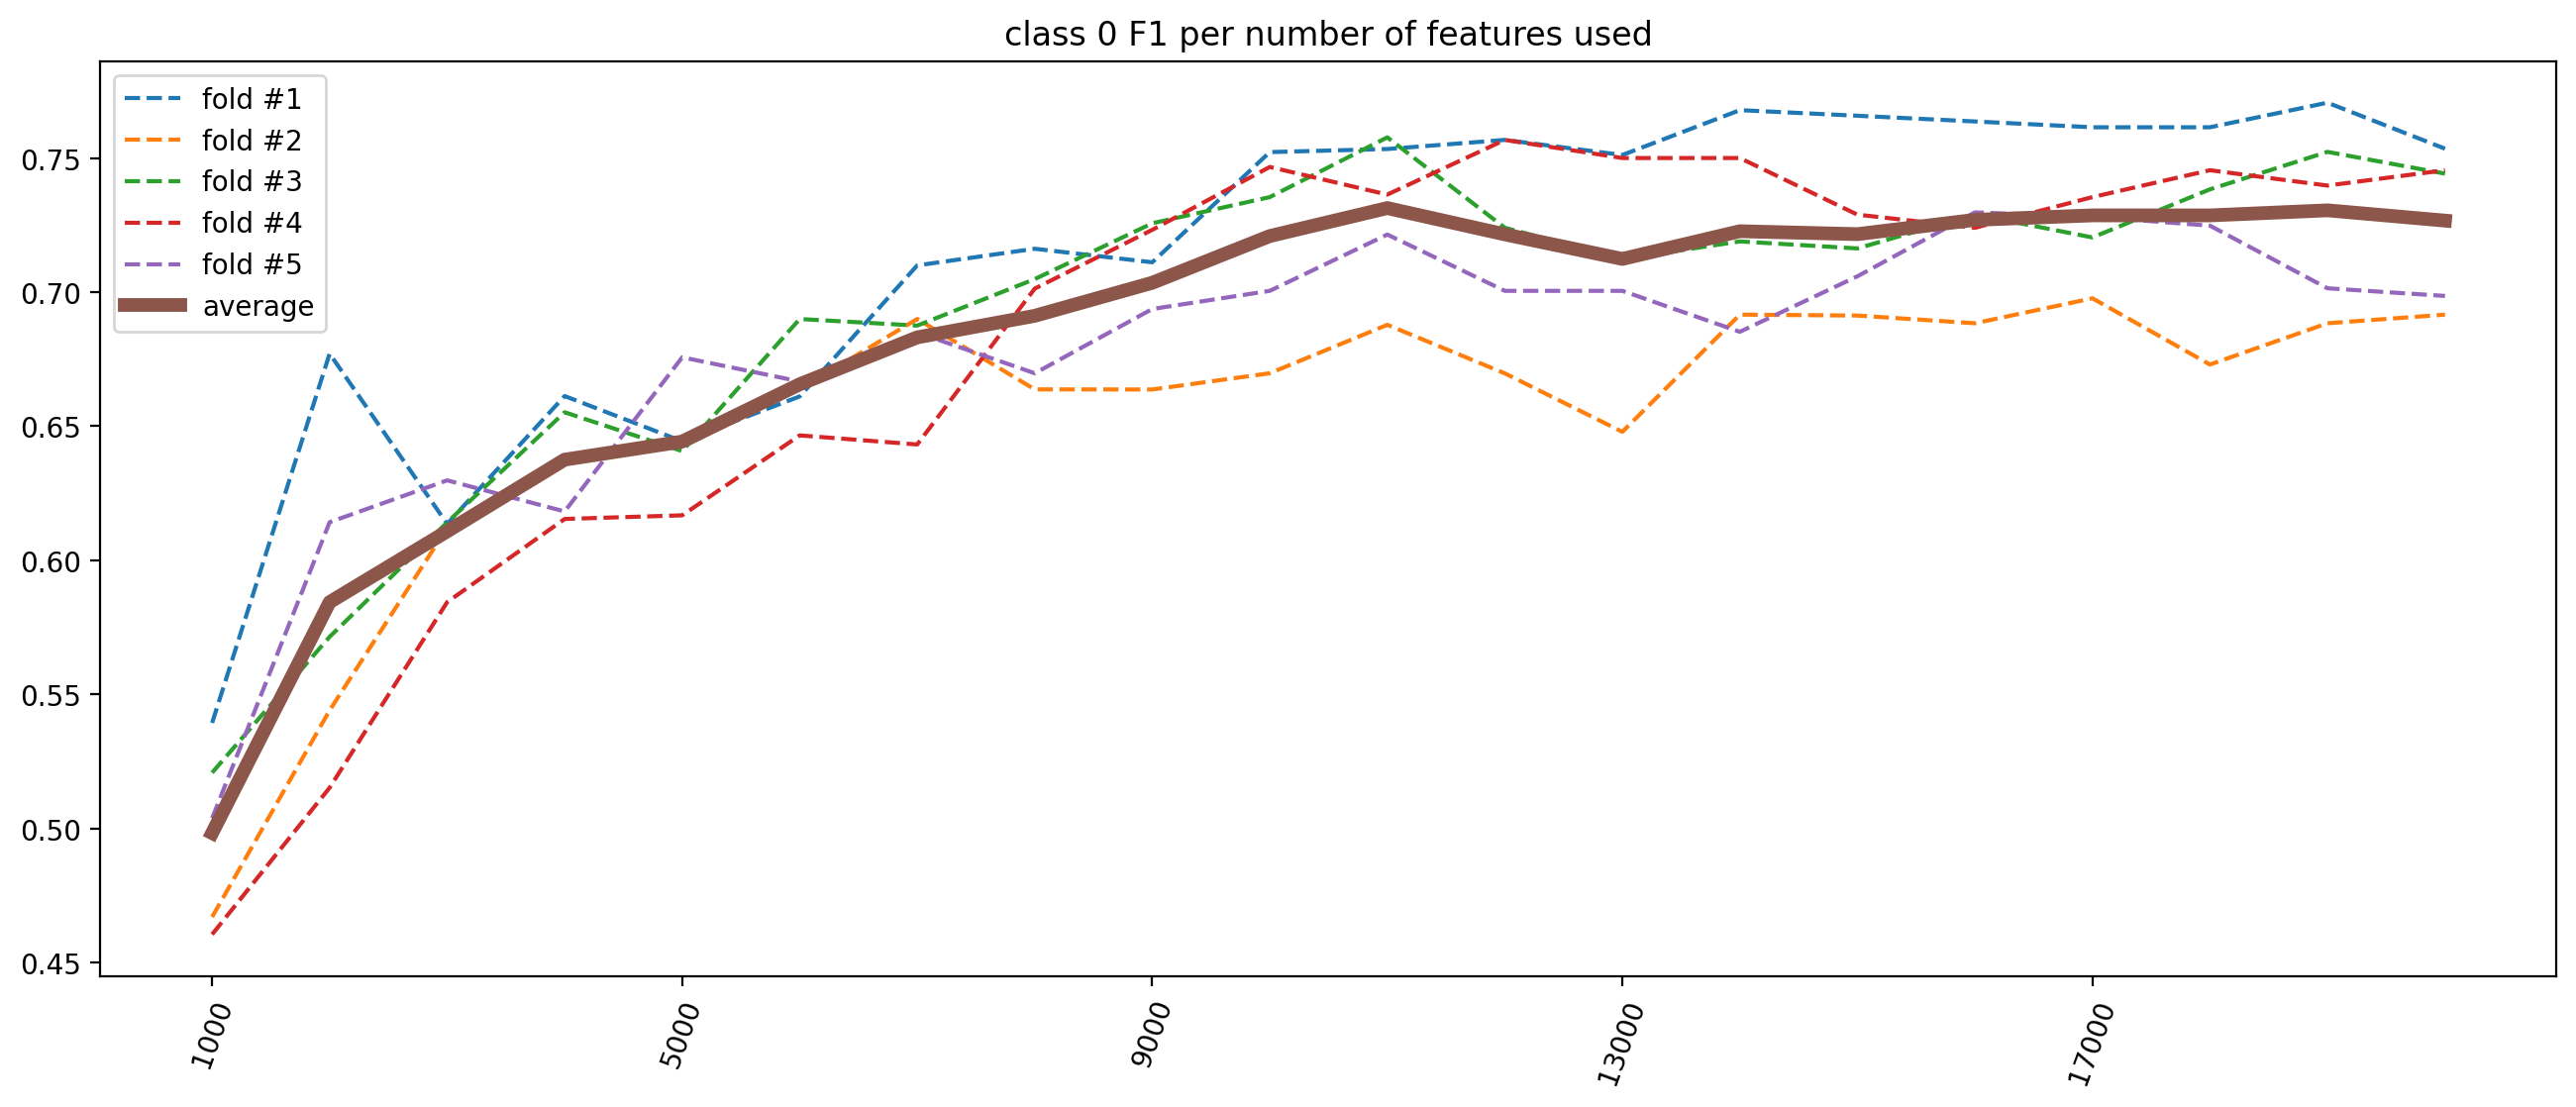

In [14]:
plot('class 0 F1 per number of features used', f1_small, x, skip=False)